<a href="https://colab.research.google.com/github/yagomsv/aulas_ciencia_de_dados_UFBA/blob/main/tecnicas_reamostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Estudo dirigido KNN e cross validation** 

---




### Objetivos:

- Simular um conjunto de dados, constituído pelas variáveis X, Y e Z formado por três subconjuntos A, B e C
- Desenvolver um classificador KNN para este conjunto. Refletir sobre os possíveis resultados e observar as consequências para:  
  - Situação 1 - Os grupos devem estar completamente desconectados
  - Situação 2 - Os grupos devem estar completamente misturados
  - Situação 3 - Simule o grupo central de tal maneira que o conjunto tenha distribuição gaussiana paras as três variáveis e mantendo o desvio padrão da largura do intervalo de uma gaussiana.
  - Testar Leave One out Cross Validation - LOOCV
  - Testar aplicação K-Fold     
  - Avaliar a importância do recurso shuffle no K-Fold

---



1. Importação de Bibliotecas 

In [ ]:
# Importando bibliotecas e metodos
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



2. Criacão de subconjuntos 

In [ ]:
# Medicoes A 
# Vetores vazios
X = []
Y = []
Z = []
nsamp = 20
# Construcao de distribuicoes uniformes
X = np.random.normal(0,1,nsamp)
Y = np.random.normal(0,1,nsamp)
Z = np.random.normal(0,1,nsamp)

flag = ['A']*nsamp

# Conhecendo a saida
print("Formato de saída X")
X.shape 



Formato de saída X


(20,)

In [ ]:
# Reunindo as tres variaveis
medA = pd.DataFrame([X,Y,Z,flag])

# transpondo o DataFrame
medA = np.transpose(medA) 

# Conhecendo a saida
print("Formato de saída medA")
medA.shape  

Formato de saída medA


(20, 4)

In [ ]:
# Medicoes B 
# Vetores vazios

X = []
Y = []
Z = []

# Construcao de distribuicoes uniformes
X = np.random.normal(2,1,nsamp)
Y = np.random.normal(2,1,nsamp)
Z = np.random.normal(2,1,nsamp)
#X = np.random.normal(2,2,nsamp)
#Y = np.random.normal(2,2,nsamp)
#Z = np.random.normal(2,2,nsamp)

flag = ['B']*nsamp

# Reunindo as tres variaveis
medB = pd.DataFrame([X,Y,Z,flag])

# transpondo o DataFrame
medB = np.transpose(medB) 

In [ ]:
# Medicoes C 
# Vetores vazios
X = []
Y = []
Z = []

# Construcao de distribuicoes uniformes
X = np.random.normal(4,1,nsamp)
Y = np.random.normal(4,1,nsamp)
Z = np.random.normal(4,1,nsamp)
flag = ['C']*nsamp


# Reunindo as tres variaveis
medC = pd.DataFrame([X,Y,Z,flag])

# transpondo o DataFrame
medC = np.transpose(medC) 


3. Concatenar subconjuntos

In [ ]:
# Concatenar DataFrames

data = pd.concat([medA, medB, medC], ignore_index=True,axis=0, join='inner')
data.shape
data = data.rename(columns={0:'X', 1: 'Y',2:'Z',3:'flag'}) 

In [ ]:
data

,X,Y,Z,flag
0,0.295497,0.036176,0.935636,A
1,0.228037,-0.730128,-0.622253,A
2,0.039297,1.205826,-1.052375,A
3,-1.207377,0.303998,-0.26836,A
4,-0.728303,0.347354,-1.665821,A
5,0.276333,0.854619,-0.30659,A
6,-0.573299,-0.133236,-0.250311,A
7,-0.854742,0.580325,0.950194,A
8,0.428712,-0.170205,-1.585478,A
9,1.968005,-1.785216,-0.180353,A


4. Visualização de Dados

In [ ]:
# Sugestao de visualizacao do video https://www.youtube.com/watch?v=DeAuVrhKw58 
import plotly.express as px
  
fig = px.scatter_3d(data,x = "X",y = 'Y',z = 'Z',color='flag')
fig.show()

5. Separação de subconjuntos de treinamento e validação

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Preditoras 
X = data.iloc[:, 0:3]
# Independente 
y = data.iloc[:, -1]

X_train,  X_test,Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=13)


6. Ajuste de modelo de classificação

In [ ]:
# Definicao do numero de vizinhos 
n_neighbors = 10
# Classificador
clf = KNeighborsClassifier(n_neighbors=n_neighbors)

# Modelo no conjunto de treinamento 
clf.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=10)

7. Classificação de dados de validação/teste

In [ ]:
# Prevendo a classificacao do conjunto de treinamento
y_pred = clf.predict(X_test)
y_pred

array(['B', 'A', 'B', 'B', 'A', 'A', 'C', 'B', 'B', 'A', 'B', 'B', 'C',
       'B', 'A', 'C', 'C', 'C'], dtype=object)

8. Relatório do desempenho do modelo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         5
           B       0.75      1.00      0.86         6
           C       1.00      0.71      0.83         7

    accuracy                           0.89        18
   macro avg       0.92      0.90      0.90        18
weighted avg       0.92      0.89      0.89        18



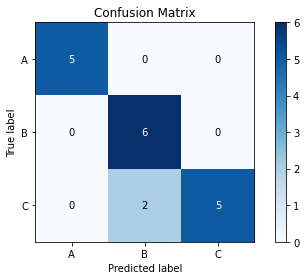

In [ ]:
# Avaliando as metricas 
#from sklearn.metrics import classification_report
## Metrics
from sklearn.metrics import classification_report, confusion_matrix
#Install -> !pip install scikit-plot
!pip install scikit-plot
import scikitplot as skplt

print(classification_report(Y_test,y_pred))

##Confusion Matrix
skplt.metrics.plot_confusion_matrix(Y_test, y_pred, normalize=False, title='Confusion Matrix')
plt.tight_layout()
plt.show();


In [ ]:
5/6

0.8333333333333334

# Reamostragem
## Validacao Cruzada

### Leave One Out Cross Validation - LOOCV

9. Conversão DataFrame em Array

In [ ]:
# Leave One Out Cross Validation - LOOCV 
from sklearn.model_selection import LeaveOneOut   

Xcv = X.to_numpy()
Ycv = y.to_numpy()

loo = LeaveOneOut()
loo.get_n_splits(Xcv)



60

In [ ]:
# check structure 
Xcv

array([[0.29549668781337296, 0.03617646098265862, 0.9356357600996281],
       [0.2280365388955656, -0.7301283673933485, -0.622252788674817],
       [0.039296881139250076, 1.2058262290101422, -1.0523748516595934],
       [-1.2073767570293557, 0.3039980528727694, -0.2683598896480381],
       [-0.7283025915246072, 0.34735418851821326, -1.6658207924111192],
       [0.2763328868741648, 0.8546185515074721, -0.30659018906619007],
       [-0.5732988685089043, -0.13323594262469038, -0.2503110800760974],
       [-0.8547420842497698, 0.5803254272817313, 0.950193958173743],
       [0.4287124497432794, -0.17020520717671903, -1.58547830043965],
       [1.9680046914308889, -1.7852160039739955, -0.18035289751412423],
       [-0.9060122567382045, 1.2012459074868131, -0.8151019072468071],
       [0.38660304466624124, -0.476775372715174, -1.5137668694622939],
       [0.29043919630867326, -0.13308858391905315, -0.08390003659661063],
       [-0.30108016625224515, 0.47454307891139796, 1.3477448405744175],
 

10. Definição de métrica e aplicação do LOOCV

In [ ]:
from sklearn.metrics import accuracy_score
criterio = []
# Definicao do numero de vizinhos 
n_neighbors = 10
# Classificador
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
for train_index, test_index in loo.split(Xcv):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = Xcv[train_index], Xcv[test_index]
  y_train, y_test = Ycv[train_index], Ycv[test_index]
#  print(X_train, X_test, y_train, y_test)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  criterio.append(accuracy_score(y_pred, y_test)) 

print(sum(criterio))


TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59] TEST: [4]
TRAIN: [ 0

### K-Fold

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

criterio = []
# Definicao do numero de vizinhos 
n_neighbors = 10

kf = KFold(n_splits=4,shuffle=True)
kf.get_n_splits(Xcv)
#print(kf)
#KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(Xcv):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = Xcv[train_index], Xcv[test_index]
  y_train, y_test = Ycv[train_index], Ycv[test_index]
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  criterio.append(accuracy_score(y_pred, y_test))

print(criterio)


TRAIN: [ 0  2  4  5  6  8 10 11 12 14 15 16 17 19 22 24 25 26 27 28 30 31 32 33
 36 37 38 40 41 42 43 45 46 47 48 49 50 51 52 54 55 56 57 58 59] TEST: [ 1  3  7  9 13 18 20 21 23 29 34 35 39 44 53]
TRAIN: [ 0  1  2  3  4  7  9 11 13 14 15 16 18 20 21 23 24 25 26 27 29 30 31 33
 34 35 36 38 39 40 41 43 44 46 47 49 50 51 52 53 54 56 57 58 59] TEST: [ 5  6  8 10 12 17 19 22 28 32 37 42 45 48 55]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 26 28
 29 32 34 35 37 38 39 41 42 43 44 45 47 48 49 52 53 54 55 57 59] TEST: [ 2 14 24 25 27 30 31 33 36 40 46 50 51 56 58]
TRAIN: [ 1  2  3  5  6  7  8  9 10 12 13 14 17 18 19 20 21 22 23 24 25 27 28 29
 30 31 32 33 34 35 36 37 39 40 42 44 45 46 48 50 51 53 55 56 58] TEST: [ 0  4 11 15 16 26 38 41 43 47 49 52 54 57 59]
[0.8, 1.0, 0.9333333333333333, 0.8666666666666667]
